In [197]:
import matplotlib.pyplot as plt
import numpy as np
import random
import os
from scipy.linalg import eig
from scipy.optimize import minimize
from scipy.stats import unitary_group
from scipy.stats import bootstrap
from collections import defaultdict
import time
import scipy.io as sio
from MIMORad import *

In [198]:
# """
# case 1: 
#   ground truth Weichselberger model parameters are known perfectly 
#   how does each method scale with clutter channel K factor = 1000
# """
# # simulation setup
# N_real = 100
# reuse_fourier_TX = True
# reuse_opt_TX = True
# omega_pwr_dB_list = np.arange(25, 45, 2)

# # MIMO base-station setup
# Mt_row, Mt_col = 4, 4
# Mr_row, Mr_col = 4, 4

# # ground-truth channel setup 
# omega_min_dB, omega_max_dB = 0, 20
# pwr_n_dB = -20
# hp_pwr_dB = 0

# # fourier beamformer parameter
# theta_search_num = 9
# phi_search_num = 9

# # channel knowledge parameters
# UR_est_error_percent = 0.0
# UT_est_error_percent = 0.0
# omega_est_error_percent = 0.0
# pwr_n_est_error_percent = 0.0
# theo_MSE = True

# Mr = Mr_row * Mr_col
# Mt = Mt_row * Mt_col

# # estimate Weichselberger model parameters from channel measurement result
# datapath = './LensFDpostpro/'
# filename = 'channels.mat'
# channels = sio.loadmat(datapath + filename)
# Hsamples_meas = channels['no-stadium-int-chan-full'][::2, ::2, :][:Mr, -Mt:, :]
# Hsamples_meas = np.nan_to_num(Hsamples_meas, nan = 0.0)
# UR, UT, omega_meas = calc_wei_params(Hsamples = Hsamples_meas)

# # simulated channel
# K_factor = 1000
# omega_meas = np.ones(omega_meas.shape)
# omega_tileda = omega_meas * 1.0
# omega_tileda = np.sqrt(omega_meas)
# omega_tileda[0, 0] = np.sum(omega_tileda.reshape(-1, )[1:]) * np.sqrt(K_factor)
# omega_orig = omega_tileda**2
# omega_orig /= np.sqrt(np.sum(omega_orig.reshape(-1,)**2))

# # # LensFD channel
# # omega_orig = omega_meas * 1.0
# # omega_orig /= np.sqrt(np.sum(omega_meas.reshape(-1,)**2))

# ## collect result from each omega_min
# time_dict_collect = defaultdict(list)
# pwr_dB_dict_collect = defaultdict(list)
# mse_dict_collect = defaultdict(list)
# lo_95_dict_collect = defaultdict(list)
# up_95_dict_collect = defaultdict(list)

# for omega_pwr_dB in omega_pwr_dB_list:
#     print("simulation for omega_pwr_dB: {} started.".format(omega_pwr_dB))
#     omega = dB2lin(omega_pwr_dB)**2 * omega_orig
#     time_dict, pwr_dB_dict, mse_dict, lo_95_dict, up_95_dict = Simulator(N_real = N_real, 
#                                                                          Mt_row = Mt_row, 
#                                                                          Mt_col = Mt_col, 
#                                                                          Mr_row = Mr_row, 
#                                                                          Mr_col = Mr_col, 
#                                                                          omega_min_dB = omega_min_dB, 
#                                                                          omega_max_dB = omega_max_dB, 
#                                                                          pwr_n_dB = pwr_n_dB, 
#                                                                          hp_pwr_dB = hp_pwr_dB, 
#                                                                          theta_search_num = theta_search_num, 
#                                                                          phi_search_num = phi_search_num, 
#                                                                          UR_est_error_percent = UR_est_error_percent, 
#                                                                          UT_est_error_percent = UT_est_error_percent, 
#                                                                          omega_est_error_percent = omega_est_error_percent, 
#                                                                          pwr_n_est_error_percent = pwr_n_est_error_percent,
#                                                                          theo_MSE = theo_MSE,
#                                                                          UR = UR,
#                                                                          UT = UT, 
#                                                                          omega = omega,
#                                                                          reuse_fourier_TX = reuse_fourier_TX,
#                                                                          reuse_opt_TX = reuse_opt_TX)
    
#     for key in time_dict:
#         time_dict_collect[key].append(time_dict[key])

#     for key in pwr_dB_dict:
#         pwr_dB_dict_collect[key].append(pwr_dB_dict[key])
        
#     for key in mse_dict:
#         mse_dict_collect[key].append(mse_dict[key])
        
#     for key in lo_95_dict:
#         lo_95_dict_collect[key].append(lo_95_dict[key])
        
#     for key in up_95_dict:
#         up_95_dict_collect[key].append(up_95_dict[key])

In [199]:
# # use precipitation / clutter channel power in x-axis 
# plt.plot(np.array(pwr_dB_dict_collect['Hp_channel_pwr_dB']) - np.array(pwr_dB_dict_collect['Hc_channel_pwr_dB']), (mse_dict_collect['LSRXBF_opt_norm']), '.-', label = 'case 1')
# plt.plot(np.array(pwr_dB_dict_collect['Hp_channel_pwr_dB']) - np.array(pwr_dB_dict_collect['Hc_channel_pwr_dB']), (mse_dict_collect['LSRXBF_fourier_norm']), '.-', label = 'case 2')
# # plt.plot(np.array(pwr_dB_dict_collect['Hp_channel_pwr_dB']) - np.array(pwr_dB_dict_collect['Hc_channel_pwr_dB']), (mse_dict_collect['LSRXBF_rand_norm']), '.-', label = 'case 3')
# # plt.plot(np.array(pwr_dB_dict_collect['Hp_channel_pwr_dB']) - np.array(pwr_dB_dict_collect['Hc_channel_pwr_dB']), (mse_dict_collect['UMRXBF_rand_norm']), '.-', label = 'case 4')
# plt.errorbar(x = (np.array(pwr_dB_dict_collect['Hp_channel_pwr_dB']) - np.array(pwr_dB_dict_collect['Hc_channel_pwr_dB'])), y = np.array(mse_dict_collect['LSRXBF_rand_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_LSRXBF_rand_norm']), np.array(up_95_dict_collect['up_95_LSRXBF_rand_norm']))),fmt = '.-', label = 'case 3')
# plt.errorbar(x = (np.array(pwr_dB_dict_collect['Hp_channel_pwr_dB']) - np.array(pwr_dB_dict_collect['Hc_channel_pwr_dB'])), y = np.array(mse_dict_collect['UMRXBF_rand_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_UMRXBF_rand_norm']), np.array(up_95_dict_collect['up_95_UMRXBF_rand_norm']))), fmt = '.-', label = 'case 4')
# plt.axhline(y = 0.1, linestyle = '-') 

# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.ylabel('normalized MSE', fontsize = 20)
# plt.xlabel('precipitation-to-clutter ratio (dB)', fontsize = 20)
# plt.yscale('log')
# plt.tick_params(axis='x', labelsize = 16)
# plt.tick_params(axis='y', labelsize = 16)
# plt.grid()
# plt.show()

In [200]:
# import os
# datapath = './matdata/PCR/Kfactormin/'
# os.makedirs(datapath, exist_ok = True)
# sio.savemat(datapath + 'time_dict_collect.mat', time_dict_collect)
# sio.savemat(datapath + 'pwr_dB_dict_collect.mat', pwr_dB_dict_collect)
# sio.savemat(datapath + 'mse_dict_collect.mat', mse_dict_collect)
# sio.savemat(datapath + 'lo_95_dict_collect.mat', lo_95_dict_collect)
# sio.savemat(datapath + 'up_95_dict_collect.mat', up_95_dict_collect)

In [201]:
# """
# case 2: 
#   ground truth Weichselberger model parameters are known perfectly 
#   how does each method scale with noise power
# """
# # simulation setup
# N_real = 20
# reuse_fourier_TX = True
# reuse_opt_TX = True
# # omega_pwr_dB_list = np.arange(25, 45, 2)
# pwr_n_dB_list = np.arange(-10, 20, 2)

# # MIMO base-station setup
# Mt_row, Mt_col = 4, 4
# Mr_row, Mr_col = 4, 4

# # ground-truth channel setup 
# omega_min_dB, omega_max_dB = -20, 0
# # pwr_n_dB = -20
# hp_pwr_dB = 0

# # fourier beamformer parameter
# theta_search_num = 9
# phi_search_num = 9

# # channel knowledge parameters
# UR_est_error_percent = 0.0
# UT_est_error_percent = 0.0
# omega_est_error_percent = 0.0
# pwr_n_est_error_percent = 0.0
# theo_MSE = True

# Mr = Mr_row * Mr_col
# Mt = Mt_row * Mt_col

# # estimate Weichselberger model parameters from channel measurement result
# datapath = './LensFDpostpro/'
# filename = 'channels.mat'
# channels = sio.loadmat(datapath + filename)
# Hsamples_meas = channels['no-stadium-int-chan-full'][::2, ::2, :][:Mr, -Mt:, :]
# Hsamples_meas = np.nan_to_num(Hsamples_meas, nan = 0.0)
# UR, UT, omega_meas = calc_wei_params(Hsamples = Hsamples_meas)

# # simulated channel
# K_factor = 1000
# omega_meas = np.ones(omega_meas.shape)
# omega_tileda = omega_meas * 1.0
# omega_tileda = np.sqrt(omega_meas)
# omega_tileda[0, 0] = np.sum(omega_tileda.reshape(-1, )[1:]) * np.sqrt(K_factor)
# omega_orig = omega_tileda**2
# omega_orig /= np.sqrt(np.sum(omega_orig.reshape(-1,)**2))

# # # LensFD channel
# # omega_orig = omega_meas * 1.0
# # omega_orig /= np.sqrt(np.sum(omega_meas.reshape(-1,)**2))

# ## collect result from each omega_min
# time_dict_collect = defaultdict(list)
# pwr_dB_dict_collect = defaultdict(list)
# mse_dict_collect = defaultdict(list)
# lo_95_dict_collect = defaultdict(list)
# up_95_dict_collect = defaultdict(list)

# for pwr_n_dB in pwr_n_dB_list:
#     print("simulation for pwr_n_dB: {} started.".format(pwr_n_dB))
#     omega = dB2lin(-20.0)**2 * omega_orig
#     time_dict, pwr_dB_dict, mse_dict, lo_95_dict, up_95_dict = Simulator(N_real = N_real, 
#                                                                          Mt_row = Mt_row, 
#                                                                          Mt_col = Mt_col, 
#                                                                          Mr_row = Mr_row, 
#                                                                          Mr_col = Mr_col, 
#                                                                          omega_min_dB = omega_min_dB, 
#                                                                          omega_max_dB = omega_max_dB, 
#                                                                          pwr_n_dB = pwr_n_dB, 
#                                                                          hp_pwr_dB = hp_pwr_dB, 
#                                                                          theta_search_num = theta_search_num, 
#                                                                          phi_search_num = phi_search_num, 
#                                                                          UR_est_error_percent = UR_est_error_percent, 
#                                                                          UT_est_error_percent = UT_est_error_percent, 
#                                                                          omega_est_error_percent = omega_est_error_percent, 
#                                                                          pwr_n_est_error_percent = pwr_n_est_error_percent,
#                                                                          theo_MSE = theo_MSE,
#                                                                          UR = UR,
#                                                                          UT = UT, 
#                                                                          omega = omega,
#                                                                          reuse_fourier_TX = reuse_fourier_TX,
#                                                                          reuse_opt_TX = reuse_opt_TX)
    
#     for key in time_dict:
#         time_dict_collect[key].append(time_dict[key])

#     for key in pwr_dB_dict:
#         pwr_dB_dict_collect[key].append(pwr_dB_dict[key])
        
#     for key in mse_dict:
#         mse_dict_collect[key].append(mse_dict[key])
        
#     for key in lo_95_dict:
#         lo_95_dict_collect[key].append(lo_95_dict[key])
        
#     for key in up_95_dict:
#         up_95_dict_collect[key].append(up_95_dict[key])

In [202]:
# # use precipitation / clutter channel power in x-axis 
# plt.plot(np.array(pwr_dB_dict_collect['opt_LS_pwr_p_dB']) - np.array(pwr_dB_dict_collect['opt_LS_pwr_n_dB']), (mse_dict_collect['LSRXBF_opt_norm']), '.-', label = 'Case 1')
# plt.plot(np.array(pwr_dB_dict_collect['fourier_LS_pwr_p_dB']) - np.array(pwr_dB_dict_collect['fourier_LS_pwr_n_dB']), (mse_dict_collect['LSRXBF_fourier_norm']), '.-', label = 'Case 2')
# plt.plot(np.array(pwr_dB_dict_collect['rand_pwr_p_dB']) - np.array(pwr_dB_dict_collect['rand_pwr_n_dB']), (mse_dict_collect['LSRXBF_rand_norm']), '.-', label = 'Case 3')
# plt.errorbar(x = (np.array(pwr_dB_dict_collect['rand_pwr_p_dB']) - np.array(pwr_dB_dict_collect['rand_pwr_n_dB'])), y = np.array(mse_dict_collect['UMRXBF_rand_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_UMRXBF_rand_norm']), np.array(up_95_dict_collect['up_95_UMRXBF_rand_norm']))), fmt = '.-', label = 'Case 4')
# plt.axhline(y = 0.1, linestyle = '-') 

# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.ylabel('normalized MSE', fontsize = 20)
# plt.xlabel('precipitation-to-noise ratio (dB)', fontsize = 20)
# plt.yscale('log')
# plt.tick_params(axis='x', labelsize = 16)
# plt.tick_params(axis='y', labelsize = 16)
# plt.grid()
# plt.show()

In [203]:
# import os
# datapath = './matdata/PNR/'
# os.makedirs(datapath, exist_ok = True)
# sio.savemat(datapath + 'time_dict_collect.mat', time_dict_collect)
# sio.savemat(datapath + 'pwr_dB_dict_collect.mat', pwr_dB_dict_collect)
# sio.savemat(datapath + 'mse_dict_collect.mat', mse_dict_collect)
# sio.savemat(datapath + 'lo_95_dict_collect.mat', lo_95_dict_collect)
# sio.savemat(datapath + 'up_95_dict_collect.mat', up_95_dict_collect)

In [204]:
# """
# case 3: 
#   ground truth Weichselberger model parameters are known perfectly 
#   how does each method scale with omega estimation error
# """
# # simulation setup
# N_real = 100
# reuse_fourier_TX = False
# reuse_opt_TX = False
# # omega_pwr_dB_list = np.arange(25, 45, 2)
# # pwr_n_dB_list = np.arange(-10, 20)
# omega_est_error_percent_list = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 0.9]

# # MIMO base-station setup
# Mt_row, Mt_col = 4, 4
# Mr_row, Mr_col = 4, 4

# # ground-truth channel setup 
# # omega_min_dB, omega_max_dB = 0, 20
# omega_dB = 10.0
# pwr_n_dB = -20
# hp_pwr_dB = 0

# # fourier beamformer parameter
# theta_search_num = 9
# phi_search_num = 9

# # channel knowledge parameters
# UR_est_error_percent = 0.0
# UT_est_error_percent = 0.0
# # omega_est_error_percent = 0.0
# pwr_n_est_error_percent = 0.0
# theo_MSE = True

# Mr = Mr_row * Mr_col
# Mt = Mt_row * Mt_col

# # estimate Weichselberger model parameters from channel measurement result
# datapath = './LensFDpostpro/'
# filename = 'channels.mat'
# channels = sio.loadmat(datapath + filename)
# Hsamples_meas = channels['no-stadium-int-chan-full'][::2, ::2, :][:Mr, -Mt:, :]
# Hsamples_meas = np.nan_to_num(Hsamples_meas, nan = 0.0)
# UR, UT, omega_meas = calc_wei_params(Hsamples = Hsamples_meas)

# # simulated channel
# K_factor = 1
# omega_meas = np.ones(omega_meas.shape)
# omega_tileda = omega_meas * 1.0
# omega_tileda = np.sqrt(omega_meas)
# omega_tileda[0, 0] = np.sum(omega_tileda.reshape(-1, )[1:]) * np.sqrt(K_factor)
# omega_orig = omega_tileda**2
# omega_orig /= np.sqrt(np.sum(omega_orig.reshape(-1,)**2))

# # # LensFD channel
# # omega_orig = omega_meas * 1.0
# # omega_orig /= np.sqrt(np.sum(omega_meas.reshape(-1,)**2))

# ## collect result from each omega_min
# time_dict_collect = defaultdict(list)
# pwr_dB_dict_collect = defaultdict(list)
# mse_dict_collect = defaultdict(list)
# lo_95_dict_collect = defaultdict(list)
# up_95_dict_collect = defaultdict(list)

# for omega_est_error_percent in omega_est_error_percent_list:
#     print("simulation for omega_est_error_percent: {} started.".format(omega_est_error_percent))
#     omega = dB2lin(omega_dB)**2 * omega_orig
#     time_dict, pwr_dB_dict, mse_dict, lo_95_dict, up_95_dict = Simulator(N_real = N_real, 
#                                                                          Mt_row = Mt_row, 
#                                                                          Mt_col = Mt_col, 
#                                                                          Mr_row = Mr_row, 
#                                                                          Mr_col = Mr_col, 
#                                                                          omega_min_dB = omega_min_dB, 
#                                                                          omega_max_dB = omega_max_dB, 
#                                                                          pwr_n_dB = pwr_n_dB, 
#                                                                          hp_pwr_dB = hp_pwr_dB, 
#                                                                          theta_search_num = theta_search_num, 
#                                                                          phi_search_num = phi_search_num, 
#                                                                          UR_est_error_percent = UR_est_error_percent, 
#                                                                          UT_est_error_percent = UT_est_error_percent, 
#                                                                          omega_est_error_percent = omega_est_error_percent, 
#                                                                          pwr_n_est_error_percent = pwr_n_est_error_percent,
#                                                                          theo_MSE = theo_MSE,
#                                                                          UR = UR,
#                                                                          UT = UT, 
#                                                                          omega = omega,
#                                                                          reuse_fourier_TX = reuse_fourier_TX,
#                                                                          reuse_opt_TX = reuse_opt_TX)
    
#     for key in time_dict:
#         time_dict_collect[key].append(time_dict[key])

#     for key in pwr_dB_dict:
#         pwr_dB_dict_collect[key].append(pwr_dB_dict[key])
        
#     for key in mse_dict:
#         mse_dict_collect[key].append(mse_dict[key])
        
#     for key in lo_95_dict:
#         lo_95_dict_collect[key].append(lo_95_dict[key])
        
#     for key in up_95_dict:
#         up_95_dict_collect[key].append(up_95_dict[key])

In [205]:
# # use precipitation / clutter channel power in x-axis 
# # plt.plot(np.array(omega_est_error_percent_list), np.array(mse_dict_collect['LSRXBF_opt_norm']), '.-', label = 'case 1')
# # plt.plot(np.array(omega_est_error_percent_list), np.array(mse_dict_collect['LSRXBF_fourier_norm']), '.-', label = 'case 2')
# # plt.plot(np.array(omega_est_error_percent_list), sorted(np.array(mse_dict_collect['LSRXBF_rand_norm'])), '.-', label = 'case 3')
# plt.errorbar(x = np.array(omega_est_error_percent_list), y = sorted(mse_dict_collect['LSRXBF_opt_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_LSRXBF_opt_norm']), np.array(up_95_dict_collect['up_95_LSRXBF_opt_norm']))), fmt = '.-', label = 'case 1')
# plt.errorbar(x = np.array(omega_est_error_percent_list), y = sorted(mse_dict_collect['LSRXBF_fourier_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_LSRXBF_fourier_norm']), np.array(up_95_dict_collect['up_95_LSRXBF_fourier_norm']))), fmt = '.-', label = 'case 2')
# plt.errorbar(x = np.array(omega_est_error_percent_list), y = sorted(mse_dict_collect['LSRXBF_rand_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_LSRXBF_rand_norm']), np.array(up_95_dict_collect['up_95_LSRXBF_rand_norm']))), fmt = '.-', label = 'case 3')

# plt.axhline(y = 0.1, linestyle = '-') 

# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.ylabel('normalized MSE', fontsize = 20)
# plt.xlabel('omega estimation error', fontsize = 20)
# plt.yscale('log')
# plt.tick_params(axis='x', labelsize = 16)
# plt.tick_params(axis='y', labelsize = 16)
# plt.grid()
# plt.show()

In [206]:
# import os
# datapath = './matdata/omegaerror/'
# os.makedirs(datapath, exist_ok = True)
# sio.savemat(datapath + 'time_dict_collect.mat', time_dict_collect)
# sio.savemat(datapath + 'pwr_dB_dict_collect.mat', pwr_dB_dict_collect)
# sio.savemat(datapath + 'mse_dict_collect.mat', mse_dict_collect)
# sio.savemat(datapath + 'lo_95_dict_collect.mat', lo_95_dict_collect)
# sio.savemat(datapath + 'up_95_dict_collect.mat', up_95_dict_collect)

In [207]:
# """
# case 4: 
#   ground truth Weichselberger model parameters are known perfectly 
#   how does each method scale with TX antenna size
# """
# # simulation setup
# N_real = 100
# reuse_fourier_TX = True
# reuse_opt_TX = True
# # Mt_list = [(2, 2), (2, 3), (2, 4), (3, 3), (2, 5), (3, 4), (2, 7), (3, 5), (4, 4), (3, 6), (4, 5), (3, 7), (3, 8)]
# Mt_list = [(1, 4), (1, 6), (1, 8), (1, 9), (1, 10), (1, 12), (1, 14), (1, 15), (1, 16), (1, 18), (1, 20), (1, 21), (1, 24)]


# # MIMO base-station setup
# # Mt_row, Mt_col = 4, 4
# Mr_row, Mr_col = 4, 4

# # ground-truth channel setup 
# omega_min_dB, omega_max_dB = 0, 20
# omega_dB = -10.0
# pwr_n_dB = 0.0
# hp_pwr_dB = 0

# # fourier beamformer parameter
# theta_search_num = 9
# phi_search_num = 9

# # channel knowledge parameters
# UR_est_error_percent = 0.0
# UT_est_error_percent = 0.0
# omega_est_error_percent = 0.0
# pwr_n_est_error_percent = 0.0
# theo_MSE = True

# Mt_max = 40
# Mr = Mr_row * Mr_col

# # estimate Weichselberger model parameters from channel measurement result
# datapath = './LensFDpostpro/'
# filename = 'channels.mat'
# channels = sio.loadmat(datapath + filename)
# Hsamples_meas = channels['no-stadium-int-chan-full'][::2, ::2, :][:Mr, -Mt_max:, :]
# Hsamples_meas = np.nan_to_num(Hsamples_meas, nan = 0.0)

# ## collect result from each omega_min
# time_dict_collect = defaultdict(list)
# pwr_dB_dict_collect = defaultdict(list)
# mse_dict_collect = defaultdict(list)
# lo_95_dict_collect = defaultdict(list)
# up_95_dict_collect = defaultdict(list)

# for (Mt_row, Mt_col) in Mt_list:
#     print("simulation for (Mt_row, Mt_col): ({}, {}) started.".format(Mt_row, Mt_col))
    
#     # LensFD channel
#     Mt = Mt_row * Mt_col
#     UR, UT, omega_meas = calc_wei_params(Hsamples = Hsamples_meas[:, -Mt:, :])
    
#     # what if I normalize the power of Hc, or equivalently, omega
#     omega_meas /= np.sqrt(np.sum(omega_meas.reshape(-1,)**2))
#     omega_meas *= Mt
#     omega = dB2lin(omega_dB) * omega_meas
    
    
    
#     time_dict, pwr_dB_dict, mse_dict, lo_95_dict, up_95_dict = Simulator(N_real = N_real, 
#                                                                          Mt_row = Mt_row, 
#                                                                          Mt_col = Mt_col, 
#                                                                          Mr_row = Mr_row, 
#                                                                          Mr_col = Mr_col, 
#                                                                          omega_min_dB = omega_min_dB, 
#                                                                          omega_max_dB = omega_max_dB, 
#                                                                          pwr_n_dB = pwr_n_dB, 
#                                                                          hp_pwr_dB = hp_pwr_dB, 
#                                                                          theta_search_num = theta_search_num, 
#                                                                          phi_search_num = phi_search_num, 
#                                                                          UR_est_error_percent = UR_est_error_percent, 
#                                                                          UT_est_error_percent = UT_est_error_percent, 
#                                                                          omega_est_error_percent = omega_est_error_percent, 
#                                                                          pwr_n_est_error_percent = pwr_n_est_error_percent,
#                                                                          theo_MSE = theo_MSE,
#                                                                          UR = UR,
#                                                                          UT = UT, 
#                                                                          omega = omega,
#                                                                          reuse_fourier_TX = reuse_fourier_TX,
#                                                                          reuse_opt_TX = reuse_opt_TX)
    
#     for key in time_dict:
#         time_dict_collect[key].append(time_dict[key])

#     for key in pwr_dB_dict:
#         pwr_dB_dict_collect[key].append(pwr_dB_dict[key])
        
#     for key in mse_dict:
#         mse_dict_collect[key].append(mse_dict[key])
        
#     for key in lo_95_dict:
#         lo_95_dict_collect[key].append(lo_95_dict[key])
        
#     for key in up_95_dict:
#         up_95_dict_collect[key].append(up_95_dict[key])

In [208]:
# Mt_num_list = [(ele[0] * ele[1]) for ele in Mt_list]

# plt.errorbar(x = np.array(Mt_num_list), y = np.array(mse_dict_collect['LSRXBF_opt_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_LSRXBF_opt_norm']), np.array(up_95_dict_collect['up_95_LSRXBF_opt_norm']))), fmt = '.-', label = 'Case 1')
# plt.errorbar(x = np.array(Mt_num_list), y = np.array(mse_dict_collect['LSRXBF_fourier_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_LSRXBF_fourier_norm']), np.array(up_95_dict_collect['up_95_LSRXBF_fourier_norm']))), fmt = '.-', label = 'Case 2')
# plt.errorbar(x = np.array(Mt_num_list), y = np.array(mse_dict_collect['LSRXBF_rand_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_LSRXBF_rand_norm']), np.array(up_95_dict_collect['up_95_LSRXBF_rand_norm']))), fmt = '.-', label = 'Case 3')
# plt.errorbar(x = np.array(Mt_num_list), y = np.array(mse_dict_collect['UMRXBF_rand_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_UMRXBF_rand_norm']), np.array(up_95_dict_collect['up_95_UMRXBF_rand_norm']))), fmt = '.-', label = 'Case 4')
# plt.axhline(y = 0.1, linestyle = '-') 
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.ylabel('normalized MSE', fontsize = 20)
# plt.xlabel('Mt', fontsize = 20)
# plt.yscale('log')
# plt.tick_params(axis='x', labelsize = 16)
# plt.tick_params(axis='y', labelsize = 16)
# plt.grid()
# plt.show()

In [209]:
# plt.plot(np.array(Mt_num_list), np.array(pwr_dB_dict_collect['Hp_channel_pwr_dB']) - np.array(pwr_dB_dict_collect['Hc_channel_pwr_dB']), label = 'PCR')
# plt.plot(np.array(Mt_num_list), np.array(pwr_dB_dict_collect['opt_LS_pwr_p_dB']) - np.array(pwr_dB_dict_collect['opt_LS_pwr_n_dB']), label = 'PNR')
# plt.ylabel('(dB)', fontsize = 20)
# plt.xlabel('Mt', fontsize = 20)
# plt.legend()
# plt.show()

In [210]:
# np.array(pwr_dB_dict_collect['Hp_channel_pwr_dB']) - np.array(pwr_dB_dict_collect['Hc_channel_pwr_dB'])

In [211]:
# import os
# datapath = './matdata/Mt/'
# os.makedirs(datapath, exist_ok = True)
# sio.savemat(datapath + 'time_dict_collect.mat', time_dict_collect)
# sio.savemat(datapath + 'pwr_dB_dict_collect.mat', pwr_dB_dict_collect)
# sio.savemat(datapath + 'mse_dict_collect.mat', mse_dict_collect)
# sio.savemat(datapath + 'lo_95_dict_collect.mat', lo_95_dict_collect)
# sio.savemat(datapath + 'up_95_dict_collect.mat', up_95_dict_collect)

In [212]:
# """
# case 5: 
#   ground truth Weichselberger model parameters are known perfectly 
#   how does each method scale with RX antenna size
# """
# # simulation setup
# N_real = 100
# N_chan_real = 20
# reuse_fourier_TX = True
# reuse_opt_TX = True
# # Mr_list = [(2, 2), (2, 3), (2, 4), (3, 3), (2, 5), (3, 4), (2, 7), (3, 5), (4, 4), (3, 6), (4, 5), (3, 7), (3, 8)]
# Mr_list = [(1, 4), (1, 6), (1, 8), (1, 9), (1, 10), (1, 12), (1, 14), (1, 15), (1, 16), (1, 18), (1, 20), (1, 21), (1, 24)]

# # MIMO base-station setup
# Mt_row, Mt_col = 4, 4
# # Mr_row, Mr_col = 4, 4

# # ground-truth channel setup 
# omega_min_dB, omega_max_dB = 0, 20
# omega_dB = 15.0
# pwr_n_dB = 0.0
# hp_pwr_dB = 0

# # fourier beamformer parameter
# theta_search_num = 9
# phi_search_num = 9

# # channel knowledge parameters
# UR_est_error_percent = 0.0
# UT_est_error_percent = 0.0
# omega_est_error_percent = 0.0
# pwr_n_est_error_percent = 0.0
# theo_MSE = True

# Mr_max = 40
# Mt = Mt_row * Mt_col

# # estimate Weichselberger model parameters from channel measurement result
# datapath = './LensFDpostpro/'
# filename = 'channels.mat'
# channels = sio.loadmat(datapath + filename)
# Hsamples_meas = channels['no-stadium-int-chan-full'][::2, ::2, :][:Mr_max, -Mt:, :]
# Hsamples_meas = np.nan_to_num(Hsamples_meas, nan = 0.0)

# ## collect result from each omega_min
# time_dict_collect = defaultdict(list)
# pwr_dB_dict_collect = defaultdict(list)
# mse_dict_collect = defaultdict(list)
# lo_95_dict_collect = defaultdict(list)
# up_95_dict_collect = defaultdict(list)

# for (Mr_row, Mr_col) in Mr_list:
#     print("simulation for (Mr_row, Mr_col): ({}, {}) started.".format(Mr_row, Mr_col))
    
#     # LensFD channel
#     Mr = Mr_row * Mr_col
#     UR, UT, omega_meas = calc_wei_params(Hsamples = Hsamples_meas[:Mr, :, :])
# #     omega_orig = omega_meas * 1.0
# #     omega_orig /= np.sqrt(np.sum(omega_meas.reshape(-1,)**2))
# #     omega = dB2lin(omega_dB)**2 * omega_orig

#     omega = dB2lin(omega_dB) * omega_meas
    
#     time_dict, pwr_dB_dict, mse_dict, lo_95_dict, up_95_dict = Simulator(N_real = N_real, 
#                                                                          Mt_row = Mt_row, 
#                                                                          Mt_col = Mt_col, 
#                                                                          Mr_row = Mr_row, 
#                                                                          Mr_col = Mr_col, 
#                                                                          omega_min_dB = omega_min_dB, 
#                                                                          omega_max_dB = omega_max_dB, 
#                                                                          pwr_n_dB = pwr_n_dB, 
#                                                                          hp_pwr_dB = hp_pwr_dB, 
#                                                                          theta_search_num = theta_search_num, 
#                                                                          phi_search_num = phi_search_num, 
#                                                                          UR_est_error_percent = UR_est_error_percent, 
#                                                                          UT_est_error_percent = UT_est_error_percent, 
#                                                                          omega_est_error_percent = omega_est_error_percent, 
#                                                                          pwr_n_est_error_percent = pwr_n_est_error_percent,
#                                                                          theo_MSE = theo_MSE,
#                                                                          N_chan_real = N_chan_real,
#                                                                          UR = UR,
#                                                                          UT = UT, 
#                                                                          omega = omega,
#                                                                          reuse_fourier_TX = reuse_fourier_TX,
#                                                                          reuse_opt_TX = reuse_opt_TX)
    
#     for key in time_dict:
#         time_dict_collect[key].append(time_dict[key])

#     for key in pwr_dB_dict:
#         pwr_dB_dict_collect[key].append(pwr_dB_dict[key])
        
#     for key in mse_dict:
#         mse_dict_collect[key].append(mse_dict[key])
        
#     for key in lo_95_dict:
#         lo_95_dict_collect[key].append(lo_95_dict[key])
        
#     for key in up_95_dict:
#         up_95_dict_collect[key].append(up_95_dict[key])

In [213]:
# Mr_num_list = [(ele[0] * ele[1]) for ele in Mr_list]
# plt.errorbar(x = np.array(Mr_num_list), y = np.array(mse_dict_collect['LSRXBF_opt_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_LSRXBF_opt_norm']), np.array(up_95_dict_collect['up_95_LSRXBF_opt_norm']))), fmt = '.-', label = 'case 1')
# # plt.errorbar(x = np.array(Mr_num_list), y = np.array(mse_dict_collect['LSRXBF_opt_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_LSRXBF_opt_norm']), np.array(up_95_dict_collect['up_95_LSRXBF_opt_norm']))), fmt = '.-', label = 'case 2')
# plt.errorbar(x = np.array(Mr_num_list), y = np.array(mse_dict_collect['LSRXBF_fourier_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_LSRXBF_fourier_norm']), np.array(up_95_dict_collect['up_95_LSRXBF_fourier_norm']))), fmt = '.-', label = 'case 2')
# plt.errorbar(x = np.array(Mr_num_list), y = np.array(mse_dict_collect['LSRXBF_rand_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_LSRXBF_rand_norm']), np.array(up_95_dict_collect['up_95_LSRXBF_rand_norm']))), fmt = '.-', label = 'case 3')
# plt.errorbar(x = np.array(Mr_num_list), y = np.array(mse_dict_collect['UMRXBF_rand_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_UMRXBF_rand_norm']), np.array(up_95_dict_collect['up_95_UMRXBF_rand_norm']))), fmt = '.-', label = 'case 4')
# plt.axhline(y = 0.1, linestyle = '-') 
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.ylabel('normalized MSE', fontsize = 20)
# plt.xlabel('Mr', fontsize = 20)
# plt.yscale('log')
# plt.tick_params(axis='x', labelsize = 16)
# plt.tick_params(axis='y', labelsize = 16)
# plt.grid()
# plt.show()

In [214]:
# plt.plot(np.array(Mr_num_list), np.array(pwr_dB_dict_collect['Hp_channel_pwr_dB']) - np.array(pwr_dB_dict_collect['Hc_channel_pwr_dB']), label = 'PCR')
# plt.plot(np.array(Mr_num_list), np.array(pwr_dB_dict_collect['opt_LS_pwr_p_dB']) - np.array(pwr_dB_dict_collect['opt_LS_pwr_n_dB']), label = 'PNR')
# plt.ylabel('(dB)', fontsize = 20)
# plt.xlabel('Mr', fontsize = 20)
# plt.legend()
# plt.show()

In [215]:
# import os
# datapath = './matdata/Mr/'
# os.makedirs(datapath, exist_ok = True)
# sio.savemat(datapath + 'time_dict_collect.mat', time_dict_collect)
# sio.savemat(datapath + 'pwr_dB_dict_collect.mat', pwr_dB_dict_collect)
# sio.savemat(datapath + 'mse_dict_collect.mat', mse_dict_collect)
# sio.savemat(datapath + 'lo_95_dict_collect.mat', lo_95_dict_collect)
# sio.savemat(datapath + 'up_95_dict_collect.mat', up_95_dict_collect)

In [216]:
# """
# case 6: 
#   precipitation channel model (i.e., one matrix) does not strictly hold true
#   how does performance scale with Hp deviation from one matrix
# """
# # simulation setup
# N_real = 1000
# N_chan_real = 20
# reuse_fourier_TX = False
# reuse_opt_TX = False
# Hp_error_percent_list = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 0.9, 1.0, 2.0, 5.0, 10.0]

# # MIMO base-station setup
# Mt_row, Mt_col = 4, 4
# Mr_row, Mr_col = 4, 4

# # ground-truth channel setup 
# # omega_min_dB, omega_max_dB = 0, 20
# omega_dB = 10.0
# pwr_n_dB = -20
# hp_pwr_dB = 0

# # fourier beamformer parameter
# theta_search_num = 9
# phi_search_num = 9

# # channel knowledge parameters
# UR_est_error_percent = 0.0
# UT_est_error_percent = 0.0
# omega_est_error_percent = 0.0
# pwr_n_est_error_percent = 0.0
# theo_MSE = False

# Mr = Mr_row * Mr_col
# Mt = Mt_row * Mt_col

# # estimate Weichselberger model parameters from channel measurement result
# datapath = './LensFDpostpro/'
# filename = 'channels.mat'
# channels = sio.loadmat(datapath + filename)
# Hsamples_meas = channels['no-stadium-int-chan-full'][::2, ::2, :][:Mr, -Mt:, :]
# Hsamples_meas = np.nan_to_num(Hsamples_meas, nan = 0.0)
# UR, UT, omega_meas = calc_wei_params(Hsamples = Hsamples_meas)

# # simulated channel
# K_factor = 1
# omega_meas = np.ones(omega_meas.shape)
# omega_tileda = omega_meas * 1.0
# omega_tileda = np.sqrt(omega_meas)
# omega_tileda[0, 0] = np.sum(omega_tileda.reshape(-1, )[1:]) * np.sqrt(K_factor)
# omega_orig = omega_tileda**2
# omega_orig /= np.sqrt(np.sum(omega_orig.reshape(-1,)**2))

# # # LensFD channel
# # omega_orig = omega_meas * 1.0
# # omega_orig /= np.sqrt(np.sum(omega_meas.reshape(-1,)**2))

# ## collect result from each omega_min
# time_dict_collect = defaultdict(list)
# pwr_dB_dict_collect = defaultdict(list)
# mse_dict_collect = defaultdict(list)
# lo_95_dict_collect = defaultdict(list)
# up_95_dict_collect = defaultdict(list)

# for Hp_error_percent in Hp_error_percent_list:
#     print("simulation for Hp_error_percent: {} started.".format(Hp_error_percent))
#     omega = dB2lin(omega_dB)**2 * omega_orig
#     time_dict, pwr_dB_dict, mse_dict, lo_95_dict, up_95_dict = Simulator(N_real = N_real, 
#                                                                          Mt_row = Mt_row, 
#                                                                          Mt_col = Mt_col, 
#                                                                          Mr_row = Mr_row, 
#                                                                          Mr_col = Mr_col, 
#                                                                          omega_min_dB = omega_min_dB, 
#                                                                          omega_max_dB = omega_max_dB, 
#                                                                          pwr_n_dB = pwr_n_dB, 
#                                                                          hp_pwr_dB = hp_pwr_dB, 
#                                                                          theta_search_num = theta_search_num, 
#                                                                          phi_search_num = phi_search_num, 
#                                                                          UR_est_error_percent = UR_est_error_percent, 
#                                                                          UT_est_error_percent = UT_est_error_percent, 
#                                                                          omega_est_error_percent = omega_est_error_percent, 
#                                                                          Hp_error_percent = Hp_error_percent,
#                                                                          pwr_n_est_error_percent = pwr_n_est_error_percent,
#                                                                          theo_MSE = theo_MSE,
#                                                                          N_chan_real = N_chan_real,
#                                                                          UR = UR,
#                                                                          UT = UT, 
#                                                                          omega = omega,
#                                                                          reuse_fourier_TX = reuse_fourier_TX,
#                                                                          reuse_opt_TX = reuse_opt_TX)
    
#     for key in time_dict:
#         time_dict_collect[key].append(time_dict[key])

#     for key in pwr_dB_dict:
#         pwr_dB_dict_collect[key].append(pwr_dB_dict[key])
        
#     for key in mse_dict:
#         mse_dict_collect[key].append(mse_dict[key])
        
#     for key in lo_95_dict:
#         lo_95_dict_collect[key].append(lo_95_dict[key])
        
#     for key in up_95_dict:
#         up_95_dict_collect[key].append(up_95_dict[key])

In [217]:
# # use precipitation / clutter channel power in x-axis 
# # plt.plot(np.array(omega_est_error_percent_list), np.array(mse_dict_collect['LSRXBF_opt_norm']), '.-', label = 'case 1')
# # plt.plot(np.array(omega_est_error_percent_list), np.array(mse_dict_collect['LSRXBF_fourier_norm']), '.-', label = 'case 2')
# # plt.plot(np.array(omega_est_error_percent_list), sorted(np.array(mse_dict_collect['LSRXBF_rand_norm'])), '.-', label = 'case 3')
# plt.errorbar(x = np.array(Hp_error_percent_list), y = sorted(mse_dict_collect['LSRXBF_opt_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_LSRXBF_opt_norm']), np.array(up_95_dict_collect['up_95_LSRXBF_opt_norm']))), fmt = '.-', label = 'case 1')
# plt.errorbar(x = np.array(Hp_error_percent_list), y = sorted(mse_dict_collect['LSRXBF_fourier_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_LSRXBF_fourier_norm']), np.array(up_95_dict_collect['up_95_LSRXBF_fourier_norm']))), fmt = '.-', label = 'case 2')
# plt.errorbar(x = np.array(Hp_error_percent_list), y = sorted(mse_dict_collect['LSRXBF_rand_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_LSRXBF_rand_norm']), np.array(up_95_dict_collect['up_95_LSRXBF_rand_norm']))), fmt = '.-', label = 'case 3')

# plt.axhline(y = 0.1, linestyle = '-') 

# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.ylabel('normalized MSE', fontsize = 20)
# plt.xlabel('Hp error', fontsize = 20)
# plt.yscale('log')
# plt.tick_params(axis='x', labelsize = 16)
# plt.tick_params(axis='y', labelsize = 16)
# plt.grid()
# plt.show()

In [218]:
# import os
# datapath = './matdata/Hperror/'
# os.makedirs(datapath, exist_ok = True)
# sio.savemat(datapath + 'time_dict_collect.mat', time_dict_collect)
# sio.savemat(datapath + 'pwr_dB_dict_collect.mat', pwr_dB_dict_collect)
# sio.savemat(datapath + 'mse_dict_collect.mat', mse_dict_collect)
# sio.savemat(datapath + 'lo_95_dict_collect.mat', lo_95_dict_collect)
# sio.savemat(datapath + 'up_95_dict_collect.mat', up_95_dict_collect)

In [219]:
# """
# case 7: 
#   LensFD channel
#   how does performance scale with PCR from one matrix
# """
# # simulation setup
# N_real = 100
# N_chan_real = 20
# reuse_fourier_TX = False
# reuse_opt_TX = False
# Hp_error_percent = 0.0

# # MIMO base-station setup
# Mt_row, Mt_col = 4, 4
# Mr_row, Mr_col = 4, 4

# # ground-truth channel setup 
# omega_min_dB, omega_max_dB = 0, 20
# # omega_dB = 10.0
# pwr_n_dB = -20
# hp_pwr_dB = 0
# omega_pwr_dB_list = np.arange(15, 40, 2)

# # fourier beamformer parameter
# theta_search_num = 9
# phi_search_num = 9

# # channel knowledge parameters
# UR_est_error_percent = 0.0
# UT_est_error_percent = 0.0
# omega_est_error_percent = 0.0
# pwr_n_est_error_percent = 0.0
# theo_MSE = True

# Mr = Mr_row * Mr_col
# Mt = Mt_row * Mt_col

# # estimate Weichselberger model parameters from channel measurement result
# datapath = './LensFDpostpro/'
# filename = 'channels.mat'
# channels = sio.loadmat(datapath + filename)

# # outdoor channel
# Hsamples_meas = channels['no-stadium-int-chan-full'][::2, ::2, :][:Mr, -Mt:, :]

# # # indoor channel
# # Hsamples_meas = channels['no-indoor-int-chan-full'][::2, ::2, :][:Mr, -Mt:, :]

# Hsamples_meas = np.nan_to_num(Hsamples_meas, nan = 0.0)
# UR, UT, omega_meas = calc_wei_params(Hsamples = Hsamples_meas)

# omega_tileda = np.sqrt(omega_meas)
# max_omega = np.max(omega_tileda.reshape(-1, ))
# K_factor = (max_omega / (np.sum(omega_tileda.reshape(-1, )) - max_omega))**2
# # print(K_factor)

# # # simulated channel
# # K_factor = 1
# # omega_meas = np.ones(omega_meas.shape)
# # omega_tileda = omega_meas * 1.0
# # omega_tileda = np.sqrt(omega_meas)
# # omega_tileda[0, 0] = np.sum(omega_tileda.reshape(-1, )[1:]) * np.sqrt(K_factor)
# # omega_orig = omega_tileda**2
# # omega_orig /= np.sqrt(np.sum(omega_orig.reshape(-1,)**2))

# # LensFD channel
# omega_orig = omega_meas * 1.0
# omega_orig /= np.sqrt(np.sum(omega_meas.reshape(-1,)**2))

# ## collect result from each omega_min
# time_dict_collect = defaultdict(list)
# pwr_dB_dict_collect = defaultdict(list)
# mse_dict_collect = defaultdict(list)
# lo_95_dict_collect = defaultdict(list)
# up_95_dict_collect = defaultdict(list)

# for omega_pwr_dB in omega_pwr_dB_list:
#     print("simulation for omega_pwr_dB: {} started.".format(omega_pwr_dB))
#     omega = dB2lin(omega_pwr_dB)**2 * omega_orig
#     time_dict, pwr_dB_dict, mse_dict, lo_95_dict, up_95_dict = Simulator(N_real = N_real, 
#                                                                          Mt_row = Mt_row, 
#                                                                          Mt_col = Mt_col, 
#                                                                          Mr_row = Mr_row, 
#                                                                          Mr_col = Mr_col, 
#                                                                          omega_min_dB = omega_min_dB, 
#                                                                          omega_max_dB = omega_max_dB, 
#                                                                          pwr_n_dB = pwr_n_dB, 
#                                                                          hp_pwr_dB = hp_pwr_dB, 
#                                                                          theta_search_num = theta_search_num, 
#                                                                          phi_search_num = phi_search_num, 
#                                                                          UR_est_error_percent = UR_est_error_percent, 
#                                                                          UT_est_error_percent = UT_est_error_percent, 
#                                                                          omega_est_error_percent = omega_est_error_percent, 
#                                                                          Hp_error_percent = Hp_error_percent,
#                                                                          pwr_n_est_error_percent = pwr_n_est_error_percent,
#                                                                          theo_MSE = theo_MSE,
#                                                                          N_chan_real = N_chan_real,
#                                                                          UR = UR,
#                                                                          UT = UT, 
#                                                                          omega = omega,
#                                                                          reuse_fourier_TX = reuse_fourier_TX,
#                                                                          reuse_opt_TX = reuse_opt_TX)
    
#     for key in time_dict:
#         time_dict_collect[key].append(time_dict[key])

#     for key in pwr_dB_dict:
#         pwr_dB_dict_collect[key].append(pwr_dB_dict[key])
        
#     for key in mse_dict:
#         mse_dict_collect[key].append(mse_dict[key])
        
#     for key in lo_95_dict:
#         lo_95_dict_collect[key].append(lo_95_dict[key])
        
#     for key in up_95_dict:
#         up_95_dict_collect[key].append(up_95_dict[key])

In [220]:
# # use precipitation / clutter channel power in x-axis 
# plt.plot(np.array(pwr_dB_dict_collect['Hp_channel_pwr_dB']) - np.array(pwr_dB_dict_collect['Hc_channel_pwr_dB']), (mse_dict_collect['LSRXBF_opt_norm']), '.-', label = 'case 1')
# plt.plot(np.array(pwr_dB_dict_collect['Hp_channel_pwr_dB']) - np.array(pwr_dB_dict_collect['Hc_channel_pwr_dB']), (mse_dict_collect['LSRXBF_fourier_norm']), '.-', label = 'case 2')
# # plt.plot(np.array(pwr_dB_dict_collect['Hp_channel_pwr_dB']) - np.array(pwr_dB_dict_collect['Hc_channel_pwr_dB']), (mse_dict_collect['LSRXBF_rand_norm']), '.-', label = 'case 3')
# # plt.plot(np.array(pwr_dB_dict_collect['Hp_channel_pwr_dB']) - np.array(pwr_dB_dict_collect['Hc_channel_pwr_dB']), (mse_dict_collect['UMRXBF_rand_norm']), '.-', label = 'case 4')
# plt.errorbar(x = (np.array(pwr_dB_dict_collect['Hp_channel_pwr_dB']) - np.array(pwr_dB_dict_collect['Hc_channel_pwr_dB'])), y = np.array(mse_dict_collect['LSRXBF_rand_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_LSRXBF_rand_norm']), np.array(up_95_dict_collect['up_95_LSRXBF_rand_norm']))),fmt = '.-', label = 'case 3')
# plt.errorbar(x = (np.array(pwr_dB_dict_collect['Hp_channel_pwr_dB']) - np.array(pwr_dB_dict_collect['Hc_channel_pwr_dB'])), y = np.array(mse_dict_collect['UMRXBF_rand_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_UMRXBF_rand_norm']), np.array(up_95_dict_collect['up_95_UMRXBF_rand_norm']))), fmt = '.-', label = 'case 4')
# plt.axhline(y = 0.1, linestyle = '-') 

# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.ylabel('normalized MSE', fontsize = 20)
# plt.xlabel('precipitation-to-clutter ratio (dB)', fontsize = 20)
# plt.yscale('log')
# plt.tick_params(axis='x', labelsize = 16)
# plt.tick_params(axis='y', labelsize = 16)
# plt.grid()
# plt.show()

In [221]:
# import os
# datapath = './matdata/LensFDchannel/'
# # datapath = './matdata/LensFDchannel_indoor/'
# os.makedirs(datapath, exist_ok = True)
# sio.savemat(datapath + 'time_dict_collect.mat', time_dict_collect)
# sio.savemat(datapath + 'pwr_dB_dict_collect.mat', pwr_dB_dict_collect)
# sio.savemat(datapath + 'mse_dict_collect.mat', mse_dict_collect)
# sio.savemat(datapath + 'lo_95_dict_collect.mat', lo_95_dict_collect)
# sio.savemat(datapath + 'up_95_dict_collect.mat', up_95_dict_collect)

In [222]:
"""
case 8: 
  with/without clutter
  fixed total number of antennas M
  how does performance scale with base station configuration?
"""
# simulation setup
N_real = 50
N_chan_real = 20
reuse_fourier_TX = False
reuse_opt_TX = False
Hp_error_percent = 0.0

# MIMO base-station setup
# Mt_row, Mt_col = 4, 4
# Mr_row, Mr_col = 4, 4
M = 32
Mt_col, Mr_col = 1, 1
Mt_row_list = list(np.arange(4, 21, 1))
# Mr_row_list = [16 for Mt_row in Mt_row_list]
Mr_row_list = Mt_row_list

# ground-truth channel setup 
omega_min_dB, omega_max_dB = 0, 20
# omega_dB = 10.0
pwr_n_dB = 0.0
hp_pwr_dB = 0.0
# omega_pwr_dB_list = np.arange(15, 40, 2)

# fourier beamformer parameter
theta_search_num = 9
phi_search_num = 9

# channel knowledge parameters
UR_est_error_percent = 0.0
UT_est_error_percent = 0.0
omega_est_error_percent = 0.0
pwr_n_est_error_percent = 0.0
theo_MSE = True

# estimate Weichselberger model parameters from channel measurement result
datapath = './LensFDpostpro/'
filename = 'channels.mat'
channels = sio.loadmat(datapath + filename)
# Hsamples_meas = channels['no-stadium-int-chan-full'][::2, ::2, :][:Mr, -Mt:, :]
# Hsamples_meas = np.nan_to_num(Hsamples_meas, nan = 0.0)
# UR, UT, omega_meas = calc_wei_params(Hsamples = Hsamples_meas)

# omega_tileda = np.sqrt(omega_meas)
# max_omega = np.max(omega_tileda.reshape(-1, ))
# K_factor = (max_omega / (np.sum(omega_tileda.reshape(-1, )) - max_omega))**2
# # print(K_factor)

# # # simulated channel
# # K_factor = 1
# # omega_meas = np.ones(omega_meas.shape)
# # omega_tileda = omega_meas * 1.0
# # omega_tileda = np.sqrt(omega_meas)
# # omega_tileda[0, 0] = np.sum(omega_tileda.reshape(-1, )[1:]) * np.sqrt(K_factor)
# # omega_orig = omega_tileda**2
# # omega_orig /= np.sqrt(np.sum(omega_orig.reshape(-1,)**2))

# # LensFD channel
# omega_orig = omega_meas * 1.0
# omega_orig /= np.sqrt(np.sum(omega_meas.reshape(-1,)**2))
# omega_pwr_dB = 0.0
# omega = dB2lin(omega_pwr_dB)**2 * omega_orig

## collect result from each omega_min
time_dict_collect = defaultdict(list)
pwr_dB_dict_collect = defaultdict(list)
mse_dict_collect = defaultdict(list)
lo_95_dict_collect = defaultdict(list)
up_95_dict_collect = defaultdict(list)

for idx, Mt_row in enumerate(Mt_row_list):
    Mr_row = Mr_row_list[idx]
    
#     # fix Mr_row
#     Mr_row = 16
    
    Mr = Mr_row * Mr_col
    Mt = Mt_row * Mt_col
    
    print("simulation for Mt: {}, Mr: {} started.".format(Mt, Mr))
    
    # outdoor channel
    Hsamples_meas = channels['no-stadium-int-chan-full'][::2, ::2, :][:Mr, -Mt:, :]
    
#     # indoor channel
#     Hsamples_meas = channels['no-indoor-int-chan-full'][::2, ::2, :][:Mr, -Mt:, :]
    
    
    Hsamples_meas = np.nan_to_num(Hsamples_meas, nan = 0.0)
    UR, UT, omega_meas = calc_wei_params(Hsamples = Hsamples_meas)

#     omega_tileda = np.sqrt(omega_meas)
#     max_omega = np.max(omega_tileda.reshape(-1, ))
#     K_factor = (max_omega / (np.sum(omega_tileda.reshape(-1, )) - max_omega))**2
    # print(K_factor)

    # # simulated channel
    # K_factor = 1
    # omega_meas = np.ones(omega_meas.shape)
    # omega_tileda = omega_meas * 1.0
    # omega_tileda = np.sqrt(omega_meas)
    # omega_tileda[0, 0] = np.sum(omega_tileda.reshape(-1, )[1:]) * np.sqrt(K_factor)
    # omega_orig = omega_tileda**2
    # omega_orig /= np.sqrt(np.sum(omega_orig.reshape(-1,)**2))

    # LensFD channel
    omega_orig = omega_meas * 1.0
#     omega_orig /= np.sqrt(np.sum(omega_meas.reshape(-1,)**2))
    omega_pwr_dB = 15.0
    omega = dB2lin(omega_pwr_dB)**2 * omega_orig

    time_dict, pwr_dB_dict, mse_dict, lo_95_dict, up_95_dict = Simulator(N_real = N_real, 
                                                                         Mt_row = Mt_col, 
                                                                         Mt_col = Mt_row, 
                                                                         Mr_row = Mr_row, 
                                                                         Mr_col = Mr_col, 
                                                                         omega_min_dB = omega_min_dB, 
                                                                         omega_max_dB = omega_max_dB, 
                                                                         pwr_n_dB = pwr_n_dB, 
                                                                         hp_pwr_dB = hp_pwr_dB, 
                                                                         theta_search_num = theta_search_num, 
                                                                         phi_search_num = phi_search_num, 
                                                                         UR_est_error_percent = UR_est_error_percent, 
                                                                         UT_est_error_percent = UT_est_error_percent, 
                                                                         omega_est_error_percent = omega_est_error_percent, 
                                                                         Hp_error_percent = Hp_error_percent,
                                                                         pwr_n_est_error_percent = pwr_n_est_error_percent,
                                                                         theo_MSE = theo_MSE,
                                                                         N_chan_real = N_chan_real,
                                                                         UR = UR,
                                                                         UT = UT, 
                                                                         omega = omega,
                                                                         reuse_fourier_TX = reuse_fourier_TX,
                                                                         reuse_opt_TX = reuse_opt_TX)
    
    for key in time_dict:
        time_dict_collect[key].append(time_dict[key])

    for key in pwr_dB_dict:
        pwr_dB_dict_collect[key].append(pwr_dB_dict[key])
        
    for key in mse_dict:
        mse_dict_collect[key].append(mse_dict[key])
        
    for key in lo_95_dict:
        lo_95_dict_collect[key].append(lo_95_dict[key])
        
    for key in up_95_dict:
        up_95_dict_collect[key].append(up_95_dict[key])

simulation for Mt: 16, Mr: 4 started.
simulation for Mt: 16, Mr: 5 started.
simulation for Mt: 16, Mr: 6 started.
simulation for Mt: 16, Mr: 7 started.
simulation for Mt: 16, Mr: 8 started.
simulation for Mt: 16, Mr: 9 started.
simulation for Mt: 16, Mr: 10 started.
simulation for Mt: 16, Mr: 11 started.
simulation for Mt: 16, Mr: 12 started.
simulation for Mt: 16, Mr: 13 started.
simulation for Mt: 16, Mr: 14 started.
simulation for Mt: 16, Mr: 15 started.
simulation for Mt: 16, Mr: 16 started.
simulation for Mt: 16, Mr: 17 started.
simulation for Mt: 16, Mr: 18 started.
simulation for Mt: 16, Mr: 19 started.
simulation for Mt: 16, Mr: 20 started.


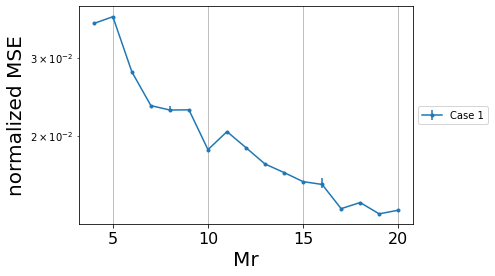

In [223]:
plt.errorbar(x = np.array(Mt_row_list) * 2, y = (mse_dict_collect['LSRXBF_opt_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_LSRXBF_opt_norm']), np.array(up_95_dict_collect['up_95_LSRXBF_opt_norm']))), fmt = '.-', label = 'Case 1')
# plt.errorbar(x = np.array(Mt_row_list) * 2, y = (mse_dict_collect['LSRXBF_fourier_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_LSRXBF_fourier_norm']), np.array(up_95_dict_collect['up_95_LSRXBF_fourier_norm']))), fmt = '.-', label = 'Case 2')
# plt.errorbar(x = np.array(Mt_row_list) * 2, y = (mse_dict_collect['LSRXBF_rand_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_LSRXBF_rand_norm']), np.array(up_95_dict_collect['up_95_LSRXBF_rand_norm']))), fmt = '.-', label = 'Case 3')
# plt.errorbar(x = np.array(Mt_row_list) * 2, y = (mse_dict_collect['UMRXBF_rand_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_UMRXBF_rand_norm']), np.array(up_95_dict_collect['up_95_UMRXBF_rand_norm']))), fmt = '.-', label = 'Case 4')

# plt.plot(np.array(Mr_row_list), (mse_dict_collect['LSRXBF_fourier_norm']), '.-', label = 'Case 1, 2')
# plt.plot(np.array(Mr_row_list), (mse_dict_collect['LSRXBF_rand_norm']), '.-', label = 'Case 3, 4')

plt.axhline(y = 0.1, linestyle = '-') 

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('normalized MSE', fontsize = 20)
plt.xlabel('M', fontsize = 20)
plt.yscale('log')
plt.tick_params(axis='x', labelsize = 16)
plt.tick_params(axis='y', labelsize = 16)
plt.grid()
plt.show()

In [169]:
# np.array(pwr_dB_dict_collect['Hp_channel_pwr_dB']) - np.array(pwr_dB_dict_collect['Hc_channel_pwr_dB'])

In [224]:
import os
datapath = './matdata/Mtotal/'
# datapath = './matdata/Mr_indoor/'
os.makedirs(datapath, exist_ok = True)
sio.savemat(datapath + 'time_dict_collect.mat', time_dict_collect)
sio.savemat(datapath + 'pwr_dB_dict_collect.mat', pwr_dB_dict_collect)
sio.savemat(datapath + 'mse_dict_collect.mat', mse_dict_collect)
sio.savemat(datapath + 'lo_95_dict_collect.mat', lo_95_dict_collect)
sio.savemat(datapath + 'up_95_dict_collect.mat', up_95_dict_collect)

In [78]:
# """
# Archive
# """
# # simulation setup
# N_real = 100
# N_chan_real = 20
# reuse_fourier_TX = True
# reuse_opt_TX = True
# Mr_list = [(2, 2), (2, 3), (2, 4), (3, 3), (2, 5), (3, 4), (2, 7), (3, 5), (4, 4), (3, 6), (4, 5), (3, 7), (3, 8)]

# # Mr_list = [(1, 16), (2, 8), (4, 4), (8, 2), (16, 1)]


# # Mt_list = [(1, 4), (1, 6), (1, 8), (1, 9), (1, 10), (1, 12), (1, 14), (1, 15), (1, 16), (1, 18), (1, 20), (1, 21), (1, 24)]
# # Mt_list = [(2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12)]


# # MIMO base-station setup
# Mt_row, Mt_col = 2, 8
# # Mr_row, Mr_col = 4, 4

# # ground-truth channel setup 
# omega_min_dB, omega_max_dB = 0, 20
# omega_dB = 15.0
# pwr_n_dB = 0.0
# hp_pwr_dB = 0

# # fourier beamformer parameter
# theta_search_num = 9
# phi_search_num = 9

# # channel knowledge parameters
# UR_est_error_percent = 0.0
# UT_est_error_percent = 0.0
# omega_est_error_percent = 0.0
# pwr_n_est_error_percent = 0.0
# theo_MSE = True

# Mr_max = 40
# Mt = Mt_row * Mt_col

# # estimate Weichselberger model parameters from channel measurement result
# datapath = './LensFDpostpro/'
# filename = 'channels.mat'
# channels = sio.loadmat(datapath + filename)
# Hsamples_meas = channels['no-stadium-int-chan-full'][::2, ::2, :][:Mr_max, -Mt:, :]
# Hsamples_meas = np.nan_to_num(Hsamples_meas, nan = 0.0)

# ## collect result from each omega_min
# time_dict_collect = defaultdict(list)
# pwr_dB_dict_collect = defaultdict(list)
# mse_dict_collect = defaultdict(list)
# lo_95_dict_collect = defaultdict(list)
# up_95_dict_collect = defaultdict(list)

# for (Mr_row, Mr_col) in Mr_list:
#     print("simulation for (Mr_row, Mr_col): ({}, {}) started.".format(Mr_row, Mr_col))
    
#     # LensFD channel
#     Mr = Mr_row * Mr_col
#     UR, UT, omega_meas = calc_wei_params(Hsamples = Hsamples_meas[:Mr, :, :])
# #     omega_orig = omega_meas * 1.0
# #     omega_orig /= np.sqrt(np.sum(omega_meas.reshape(-1,)**2))
# #     omega = dB2lin(omega_dB)**2 * omega_orig

#     omega = dB2lin(omega_dB) * omega_meas
    
#     time_dict, pwr_dB_dict, mse_dict, lo_95_dict, up_95_dict = Simulator(N_real = N_real, 
#                                                                          Mt_row = Mt_row, 
#                                                                          Mt_col = Mt_col, 
#                                                                          Mr_row = Mr_row, 
#                                                                          Mr_col = Mr_col, 
#                                                                          omega_min_dB = omega_min_dB, 
#                                                                          omega_max_dB = omega_max_dB, 
#                                                                          pwr_n_dB = pwr_n_dB, 
#                                                                          hp_pwr_dB = hp_pwr_dB, 
#                                                                          theta_search_num = theta_search_num, 
#                                                                          phi_search_num = phi_search_num, 
#                                                                          UR_est_error_percent = UR_est_error_percent, 
#                                                                          UT_est_error_percent = UT_est_error_percent, 
#                                                                          omega_est_error_percent = omega_est_error_percent, 
#                                                                          pwr_n_est_error_percent = pwr_n_est_error_percent,
#                                                                          theo_MSE = theo_MSE,
#                                                                          N_chan_real = N_chan_real,
#                                                                          UR = UR,
#                                                                          UT = UT, 
#                                                                          omega = omega,
#                                                                          reuse_fourier_TX = reuse_fourier_TX,
#                                                                          reuse_opt_TX = reuse_opt_TX)
    
#     for key in time_dict:
#         time_dict_collect[key].append(time_dict[key])

#     for key in pwr_dB_dict:
#         pwr_dB_dict_collect[key].append(pwr_dB_dict[key])
        
#     for key in mse_dict:
#         mse_dict_collect[key].append(mse_dict[key])
        
#     for key in lo_95_dict:
#         lo_95_dict_collect[key].append(lo_95_dict[key])
        
#     for key in up_95_dict:
#         up_95_dict_collect[key].append(up_95_dict[key])

In [79]:
# Mr_num_list = [(ele[0] * ele[1]) for ele in Mr_list]
# plt.errorbar(x = np.array(Mr_num_list), y = np.array(mse_dict_collect['LSRXBF_opt_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_LSRXBF_opt_norm']), np.array(up_95_dict_collect['up_95_LSRXBF_opt_norm']))), fmt = '.-', label = 'case 1')
# plt.errorbar(x = np.array(Mr_num_list), y = np.array(mse_dict_collect['LSRXBF_fourier_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_LSRXBF_fourier_norm']), np.array(up_95_dict_collect['up_95_LSRXBF_fourier_norm']))), fmt = '.-', label = 'case 2')
# # plt.errorbar(x = np.array(Mr_num_list), y = np.array(mse_dict_collect['LSRXBF_rand_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_LSRXBF_rand_norm']), np.array(up_95_dict_collect['up_95_LSRXBF_rand_norm']))), fmt = '.-', label = 'case 3')
# # plt.errorbar(x = np.array(Mr_num_list), y = np.array(mse_dict_collect['UMRXBF_rand_norm']), yerr = np.vstack((np.array(lo_95_dict_collect['lo_95_UMRXBF_rand_norm']), np.array(up_95_dict_collect['up_95_UMRXBF_rand_norm']))), fmt = '.-', label = 'case 4')
# plt.axhline(y = 0.1, linestyle = '-') 
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.ylabel('normalized MSE', fontsize = 20)
# plt.xlabel('Mr', fontsize = 20)
# plt.yscale('log')
# plt.tick_params(axis='x', labelsize = 16)
# plt.tick_params(axis='y', labelsize = 16)
# plt.grid()
# plt.show()

In [80]:
# plt.plot(np.array(Mr_num_list), np.array(pwr_dB_dict_collect['Hp_channel_pwr_dB']) - np.array(pwr_dB_dict_collect['Hc_channel_pwr_dB']), label = 'PCR')
# plt.plot(np.array(Mr_num_list), np.array(pwr_dB_dict_collect['opt_LS_pwr_p_dB']) - np.array(pwr_dB_dict_collect['opt_LS_pwr_n_dB']), label = 'PNR')
# plt.ylabel('(dB)', fontsize = 20)
# plt.xlabel('Mr', fontsize = 20)
# plt.legend()
# plt.show()

In [81]:
# import os
# datapath = './matdata/Mr/'
# os.makedirs(datapath, exist_ok = True)
# sio.savemat(datapath + 'time_dict_collect.mat', time_dict_collect)
# sio.savemat(datapath + 'pwr_dB_dict_collect.mat', pwr_dB_dict_collect)
# sio.savemat(datapath + 'mse_dict_collect.mat', mse_dict_collect)
# sio.savemat(datapath + 'lo_95_dict_collect.mat', lo_95_dict_collect)
# sio.savemat(datapath + 'up_95_dict_collect.mat', up_95_dict_collect)